In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from synthetic_env_julia_solver import synthetic_env

In [2]:
kappa = 0.001
BETA = 0.1
D = 0.1
PHI = 0.1#2*D+np.sqrt(BETA+4*D**2)#0.7#1.2
NU = 0.99

In [3]:
env = synthetic_env(0.1,BETA, kappa,D,NU)
env.deltaT = 0.01
delta_t = env.deltaT
delta_r = 0.002
env.limit = 5.0

In [4]:
num_steps = 0
while not env.isOver():
    env.step(0.1)
    num_steps+=1
print(num_steps)
env.reset()

500


In [5]:
"""
TODO the direct baseline comparison test (or analog) within the wrapped up environment...
"""
dictionary = {}
episodes = 20000
num_steps = int(env.limit/env.deltaT)
for epi in range(episodes):
    separations = np.zeros(num_steps)
    penalties = np.zeros(num_steps)
    step = 0
    while not env.isOver():
        penalty = env.step(PHI)
        penalties[step] = penalty
        separations[step] = env.dist()
        step += 1
    #temporarily store location to intialize next episode
    temp = env.sep_vec
    env.reset()
    env.sep_vec = temp
    
    
    # calculate the return by discounting based on env.deltaT
    returns = np.zeros(num_steps)
    discount = np.exp(-NU*env.deltaT)
    S_n=0
    #TODO FIX THIS
    for i in reversed(range(num_steps)):
        S_n = S_n*discount + penalties[i]
        returns[i] = S_n
        
        
    #put the values in the dictionary based on r and t    
    for i in range(len(returns)):
        key = (i, int(separations[i]/delta_r))
        if key in dictionary:
            # increase sum and count
            dictionary[key] = dictionary[key][0] + returns[i], dictionary[key][1] + 1
        else:
            dictionary[key] = [returns[i], 1]
    
    

# save dictionary to csv
with open(f'noise_corrected_bins_{episodes}_{delta_t}_{env.limit}RL_env.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=list(dictionary.keys()))
    writer.writeheader()
    writer.writerow(dictionary)
        
    

In [6]:
# Specfic to 2 dimensions
def baseline(time_remaining,separation):
    dims=2
    # a useful intermediate value used in the baseline calculations
    d_tilde = 4*D
    block = NU + 2*PHI - d_tilde
    
    def A():
        num = (BETA + PHI**2)*(1-np.exp(-time_remaining*block))
        denom = block
        return num/denom
    
    def B():
        first_term = dims * kappa * (BETA + PHI**2) / (NU*(2*PHI-d_tilde))
        second_term = 1 - np.exp(-NU*time_remaining) - NU * (1-np.exp(-time_remaining*block))/block
        return first_term*second_term
        
    
    return -A()*separation**2 + -B()

In [7]:
t_end = env.limit
sampled = np.zeros([100,num_steps])
evaluated = np.zeros([100,num_steps])
count_threshhold = 100
for key, value in dictionary.items():
    if value[1] > count_threshhold:
        time_remaining = (t_end) - key[0]*delta_t
        sep = (key[1])*delta_r
        sampled[key[1]][key[0]] = value[0]/value[1]
        evaluated[key[1]][key[0]] = baseline(time_remaining,sep)

Text(0.5, 1.0, 'difference')

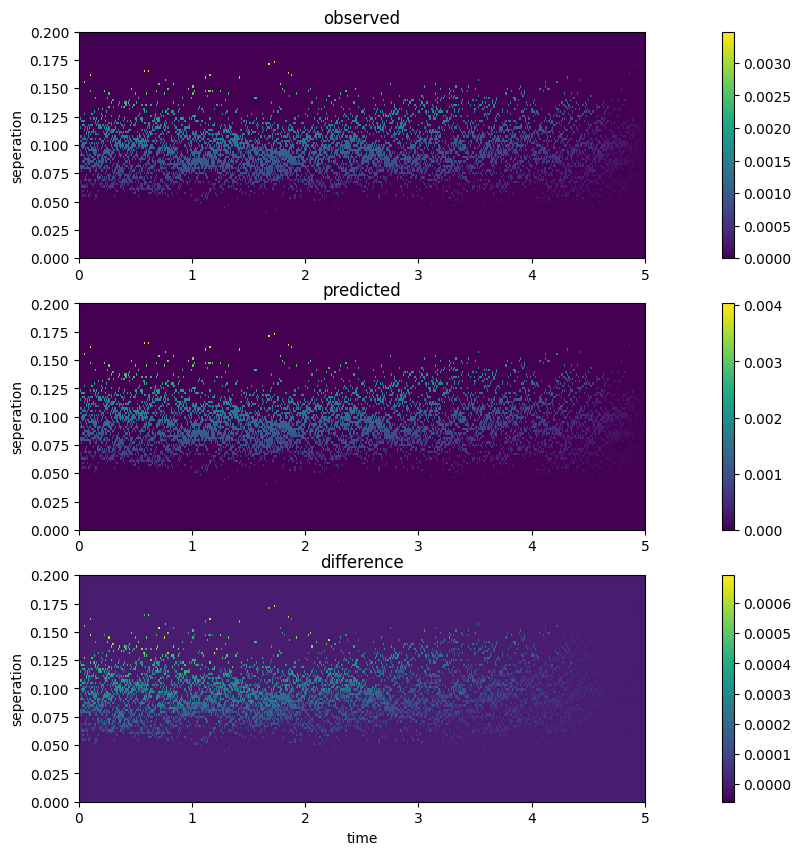

In [8]:
fig, ax = plt.subplots(3, 1) 
scale = ax[0].imshow(np.flip(-sampled,axis=0), interpolation='nearest', extent = [0 , sampled.shape[1]*delta_t,0,delta_r*sampled.shape[0]], aspect=10)
scale2 = ax[1].imshow(np.flip(-evaluated,axis=0), interpolation='nearest', extent = [0 , sampled.shape[1]*delta_t,0,delta_r*sampled.shape[0]], aspect=10)
scale3 = ax[2].imshow(np.flip(-(evaluated-sampled),axis=0), interpolation='nearest', extent = [0 , sampled.shape[1]*delta_t,0,delta_r*sampled.shape[0]], aspect=10)
fig.set_size_inches(20,10)
fig.colorbar(scale, ax=ax[0])
fig.colorbar(scale2, ax=ax[1])
fig.colorbar(scale3, ax=ax[2])

#ax[0].set_xlabel('time')
ax[0].set_ylabel('seperation')
ax[0].set_title("observed")

#ax[1].set_xlabel('time')
ax[1].set_ylabel('seperation')
ax[1].set_title("predicted")

ax[2].set_xlabel('time')
ax[2].set_ylabel('seperation')
ax[2].set_title("difference")

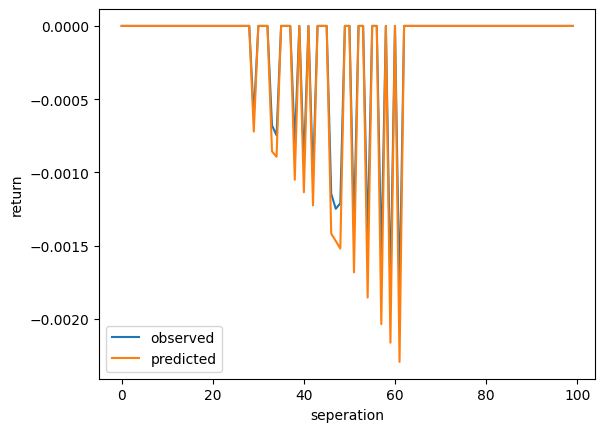

In [9]:
plt.plot(sampled[:,0])
plt.plot(evaluated[:,0])
plt.xlabel("seperation")
plt.ylabel("return")
plt.legend(labels=["observed","predicted"])

In [10]:
assert(1==0)

AssertionError: 

In [ ]:
pen = []
env.reset()
for i in range(100):
#    env.reset()
    pen.append(env.step(0.))
plt.plot(pen)

In [ ]:
pen = []
env.reset()
for i in range(100):

    pen.append(env.step(0.3))
plt.plot(pen)

In [ ]:
pen = []
env.reset()
for i in range(100):

    pen.append(env.step(5.7))
plt.plot(pen)
plt.title("TEST")

In [ ]:
env.reset()
for i in range(10):
    env.step(0.)
prior = env.eval_step(2.0)
pen = env.step(10.57)
post =  env.eval_step(2.0)
advantage = pen+post-prior
print(advantage)

In [ ]:
prior

In [ ]:
pen+post

In [ ]:
pen

In [ ]:
post

In [ ]:
advantange